In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [3]:
df_schedules = pd.read_csv('schedules.csv')

In [10]:
df_schedules['class_duration'] = df_schedules.end_time - df_schedules.start_time

In [11]:
df_schedules['class_duration'].head()

0     0
1    50
2    50
3    50
4    50
Name: class_duration, dtype: int64

In [13]:
df_schedules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 11 columns):
uuid              4467 non-null object
start_time        4467 non-null int64
end_time          4467 non-null int64
mon               4467 non-null bool
tues              4467 non-null bool
wed               4467 non-null bool
thurs             4467 non-null bool
fri               4467 non-null bool
sat               4467 non-null bool
sun               4467 non-null bool
class_duration    4467 non-null int64
dtypes: bool(7), int64(3), object(1)
memory usage: 170.2+ KB


In [118]:
sample = np.random.choice(df_schedules.class_duration, size =800)

In [127]:
sample.mean()

121.09

In [245]:
bootstrap_samples = []
bootstrap_sample_means = np.zeros(1000)
bootstrap_sample_95pcts = np.zeros(1000)
for i in range(1000):
    bootstrap_sample = np.random.choice(sample, size=800)
    bootstrap_samples.append(bootstrap_sample)
    bootstrap_sample_means[i] = bootstrap_sample.mean()
    bootstrap_sample_95pct = np.percentile(a=bootstrap_sample, q=95)
    bootstrap_sample_95pcts[i] = bootstrap_sample_95pct

In [246]:
bootstrap_sample_means[:10]

array([120.19125, 120.7175 , 120.325  , 123.57625, 124.28875, 121.915  ,
       124.74875, 121.2925 , 114.65875, 118.5175 ])

In [247]:
bootstrap_sample_95pcts[:10]

array([245.25, 255.  , 255.75, 255.  , 245.  , 300.  , 271.5 , 240.  ,
       240.  , 240.  ])

In [248]:
np.std(bootstrap_sample_95pcts)

19.252159463291335

(array([  2.,   1.,   3., 544., 191., 168.,   0.,  81.,   0.,  10.]),
 array([195.  , 208.65, 222.3 , 235.95, 249.6 , 263.25, 276.9 , 290.55,
        304.2 , 317.85, 331.5 ]),
 <a list of 10 Patch objects>)

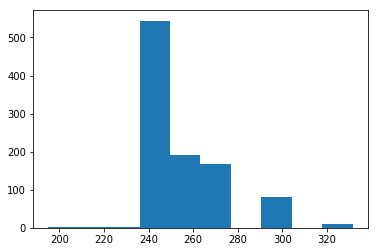

In [249]:
plt.hist(bootstrap_sample_95pcts)

In [250]:
np.percentile(a=bootstrap_sample_95pcts, q=2.5)

240.0

In [251]:
np.percentile(a=bootstrap_sample_95pcts, q=97.5)

300.0

In [252]:
#df_schedules.class_duration.mean()

In [253]:
np.percentile(a=df_schedules.class_duration, q=95)

240.0